**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [10]:
import numpy as np

In [2]:
print(np.__version__)

1.20.1


In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [5]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [4]:
from statsmodels.stats.proportion import proportion_confint

In [32]:
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [5]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [6]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [7]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [8]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [13]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [14]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [15]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [16]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [17]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [14]:
samplesize_confint_proportion(0.02, 0.01)

752.9259288560489

In [20]:
b = []
for i in np.arange(0, 1.01, 0.01):
    b.append(int(np.ceil(samplesize_confint_proportion(i, 0.01))))

In [17]:
np.arange(0, 1.01, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [26]:
from matplotlib import pyplot as plt

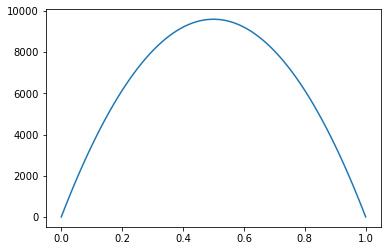

In [27]:
plt.plot(np.arange(0, 1.01, 0.01), b)

In [28]:
max(b)

9604